In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


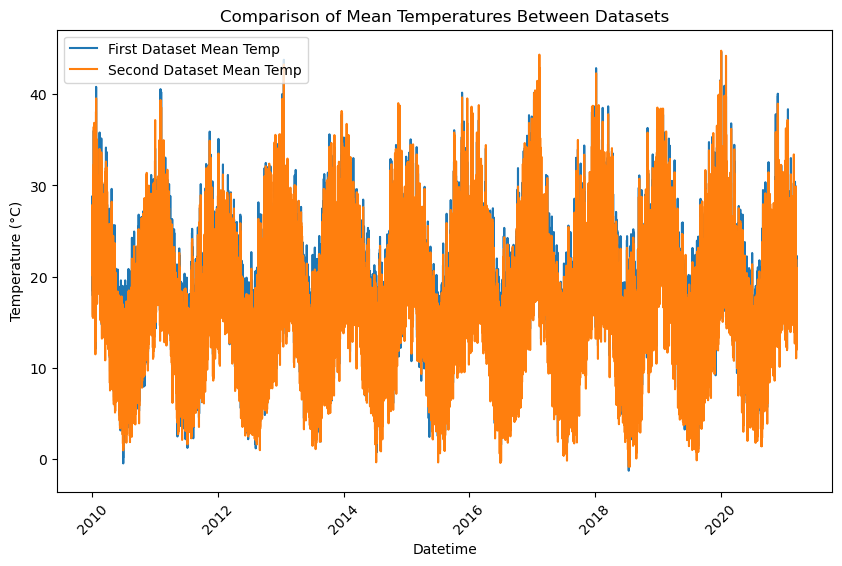

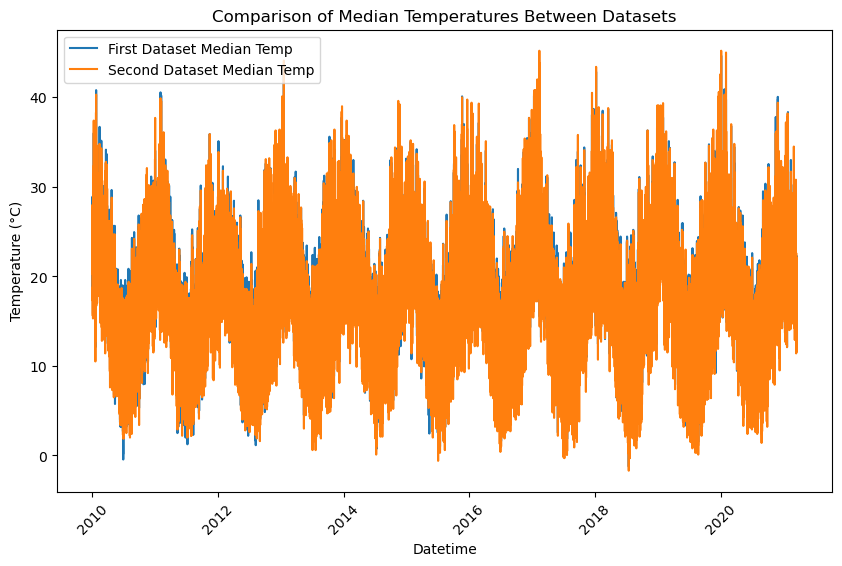


Summary statistics for first dataset:
         mean_temp1  median_temp1
count  98075.000000  98075.000000
mean      17.526472     17.525349
std        5.868027      5.868919
min       -1.250000     -1.250000
25%       13.450000     13.450000
50%       17.850000     17.850000
75%       21.500000     21.500000
max       44.650000     44.650000

Summary statistics for second dataset:
         mean_temp2  median_temp2
count  98007.000000  98007.000000
mean      16.508002     16.850447
std        6.322227      6.419563
min       -0.814286     -1.700000
25%       12.028571     12.300000
50%       16.471429     16.900000
75%       20.514286     21.000000
max       44.757143     45.200000


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first dataset
df_temp1 = pd.read_csv("../data/NSW/temperature_nsw.csv", names=["LOCATION", "DATETIME", "TEMPERATURE"], header=0)

# Load the second dataset
df_temp2 = pd.read_csv("../data/NSW/aggregated_temperature_data.csv", names=["Date", "Time", "mean_temp", "median_temp"], header=0)

# Convert the 'DATETIME' column in the first dataset to a datetime object
df_temp1['DATETIME'] = pd.to_datetime(df_temp1['DATETIME'], errors='coerce', format="%d/%m/%Y %H:%M")

# Combine 'Date' and 'Time' columns in the second dataset into a single 'datetime' column
df_temp2['datetime'] = pd.to_datetime(df_temp2['Date'] + ' ' + df_temp2['Time'], format="%d/%m/%Y %H:%M")

# Remove rows with invalid datetime values if any
df_temp1.dropna(subset=['DATETIME'], inplace=True)
df_temp2.dropna(subset=['datetime'], inplace=True)

# Aggregate the first dataset by hour (mean temperature per hour)
df_temp1_hourly = df_temp1.resample('H', on='DATETIME').agg({'TEMPERATURE': ['mean', 'median']}).reset_index()
df_temp1_hourly.columns = ['DATETIME', 'mean_temp1', 'median_temp1']

# Aggregate the second dataset by hour (mean and median temperature)
df_temp2_hourly = df_temp2.resample('H', on='datetime').agg({'mean_temp': 'mean', 'median_temp': 'median'}).reset_index()
df_temp2_hourly.columns = ['datetime', 'mean_temp2', 'median_temp2']

# Comparison: we will compare the two datasets by plotting their mean temperatures and median temperatures over time.

# Plotting mean temperature comparison
plt.figure(figsize=(10, 6))
plt.plot(df_temp1_hourly['DATETIME'], df_temp1_hourly['mean_temp1'], label="First Dataset Mean Temp")
plt.plot(df_temp2_hourly['datetime'], df_temp2_hourly['mean_temp2'], label="Second Dataset Mean Temp")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.title("Comparison of Mean Temperatures Between Datasets")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting median temperature comparison
plt.figure(figsize=(10, 6))
plt.plot(df_temp1_hourly['DATETIME'], df_temp1_hourly['median_temp1'], label="First Dataset Median Temp")
plt.plot(df_temp2_hourly['datetime'], df_temp2_hourly['median_temp2'], label="Second Dataset Median Temp")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.title("Comparison of Median Temperatures Between Datasets")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate summary statistics for both datasets
print("\nSummary statistics for first dataset:")
print(df_temp1_hourly[['mean_temp1', 'median_temp1']].describe())

print("\nSummary statistics for second dataset:")
print(df_temp2_hourly[['mean_temp2', 'median_temp2']].describe())



In [52]:
# Extract the year from the datetime column for both datasets
df_temp['year'] = df_temp['datetime'].dt.year
df_temp2['year'] = df_temp2['datetime'].dt.year


In [53]:
# Summary statistics for the first dataset
print("\nSummary statistics for first dataset:")
print(df_temp.describe())

# Summary statistics for the second dataset
print("\nSummary statistics for second dataset:")
print(df_temp2.describe())



Summary statistics for first dataset:
                            datetime           temp           year
count                         220326  220326.000000  220326.000000
mean   2015-08-16 07:59:12.964243712      17.418827    2015.130584
min              2010-01-01 00:00:00      -1.300000    2010.000000
25%              2012-11-02 23:07:30      13.400000    2012.000000
50%              2015-08-16 13:45:00      17.700000    2015.000000
75%              2018-06-03 14:22:30      21.300000    2018.000000
max              2021-03-18 00:00:00      44.700000    2021.000000
std                              NaN       5.849763       3.229999

Summary statistics for second dataset:
          mean_temp   median_temp             datetime          year
count  98007.000000  98007.000000                98280  98280.000000
mean      16.508002     16.850447  2015-08-10 12:30:00   2015.113665
min       -0.814286     -1.700000  2010-01-01 01:00:00   2010.000000
25%       12.028571     12.300000  2012-10

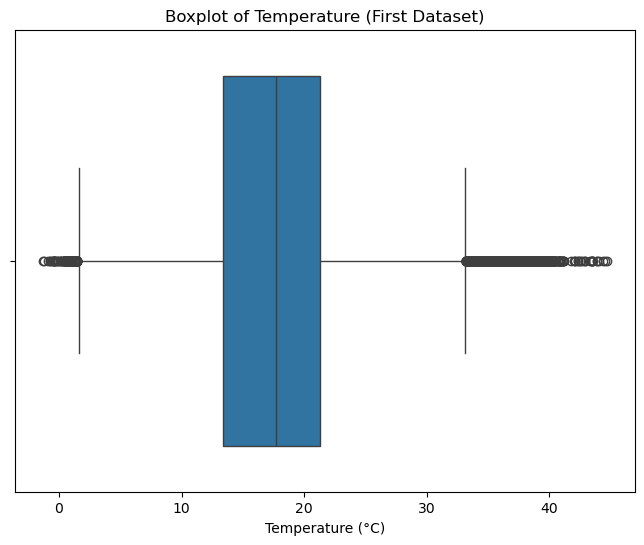

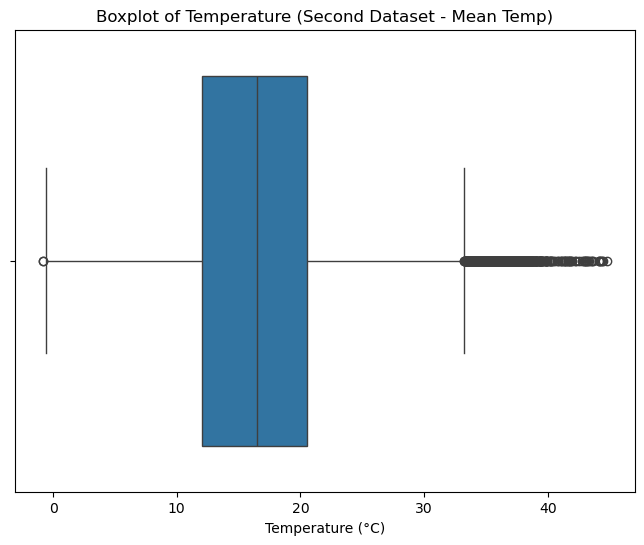

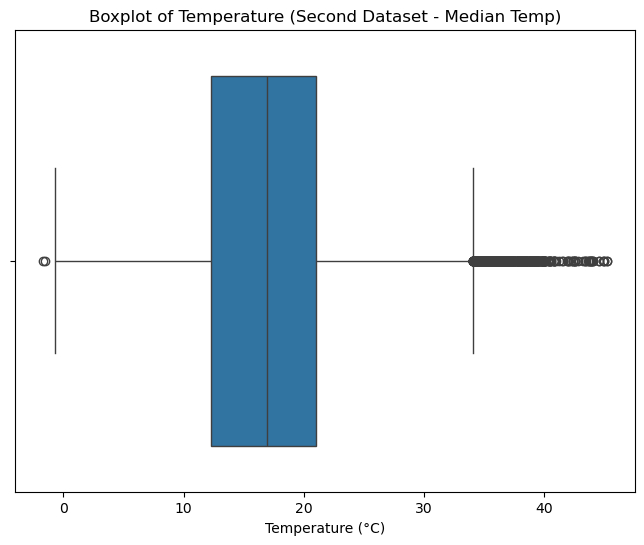

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the first dataset
df_temp1 = pd.read_csv("../data/NSW/temperature_nsw.csv", names=["LOCATION", "DATETIME", "TEMPERATURE"], header=0)

# Load the second dataset
df_temp2 = pd.read_csv("../data/NSW/aggregated_temperature_data.csv", names=["Date", "Time", "mean_temp", "median_temp"], header=0)

# Convert the 'DATETIME' column in the first dataset to a datetime object
df_temp1['DATETIME'] = pd.to_datetime(df_temp1['DATETIME'], errors='coerce', format="%d/%m/%Y %H:%M")

# Combine 'Date' and 'Time' columns in the second dataset into a single 'datetime' column
df_temp2['datetime'] = pd.to_datetime(df_temp2['Date'] + ' ' + df_temp2['Time'], format="%d/%m/%Y %H:%M")

# Remove rows with invalid datetime values if any
df_temp1.dropna(subset=['DATETIME'], inplace=True)
df_temp2.dropna(subset=['datetime'], inplace=True)

# Plot boxplot for the first dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp1, x="TEMPERATURE")
plt.title("Boxplot of Temperature (First Dataset)")
plt.xlabel("Temperature (°C)")
plt.show()

# Plot boxplot for the second dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp2, x="mean_temp")
plt.title("Boxplot of Temperature (Second Dataset - Mean Temp)")
plt.xlabel("Temperature (°C)")
plt.show()

# Optionally, you can also plot the median temperature for the second dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp2, x="median_temp")
plt.title("Boxplot of Temperature (Second Dataset - Median Temp)")
plt.xlabel("Temperature (°C)")
plt.show()

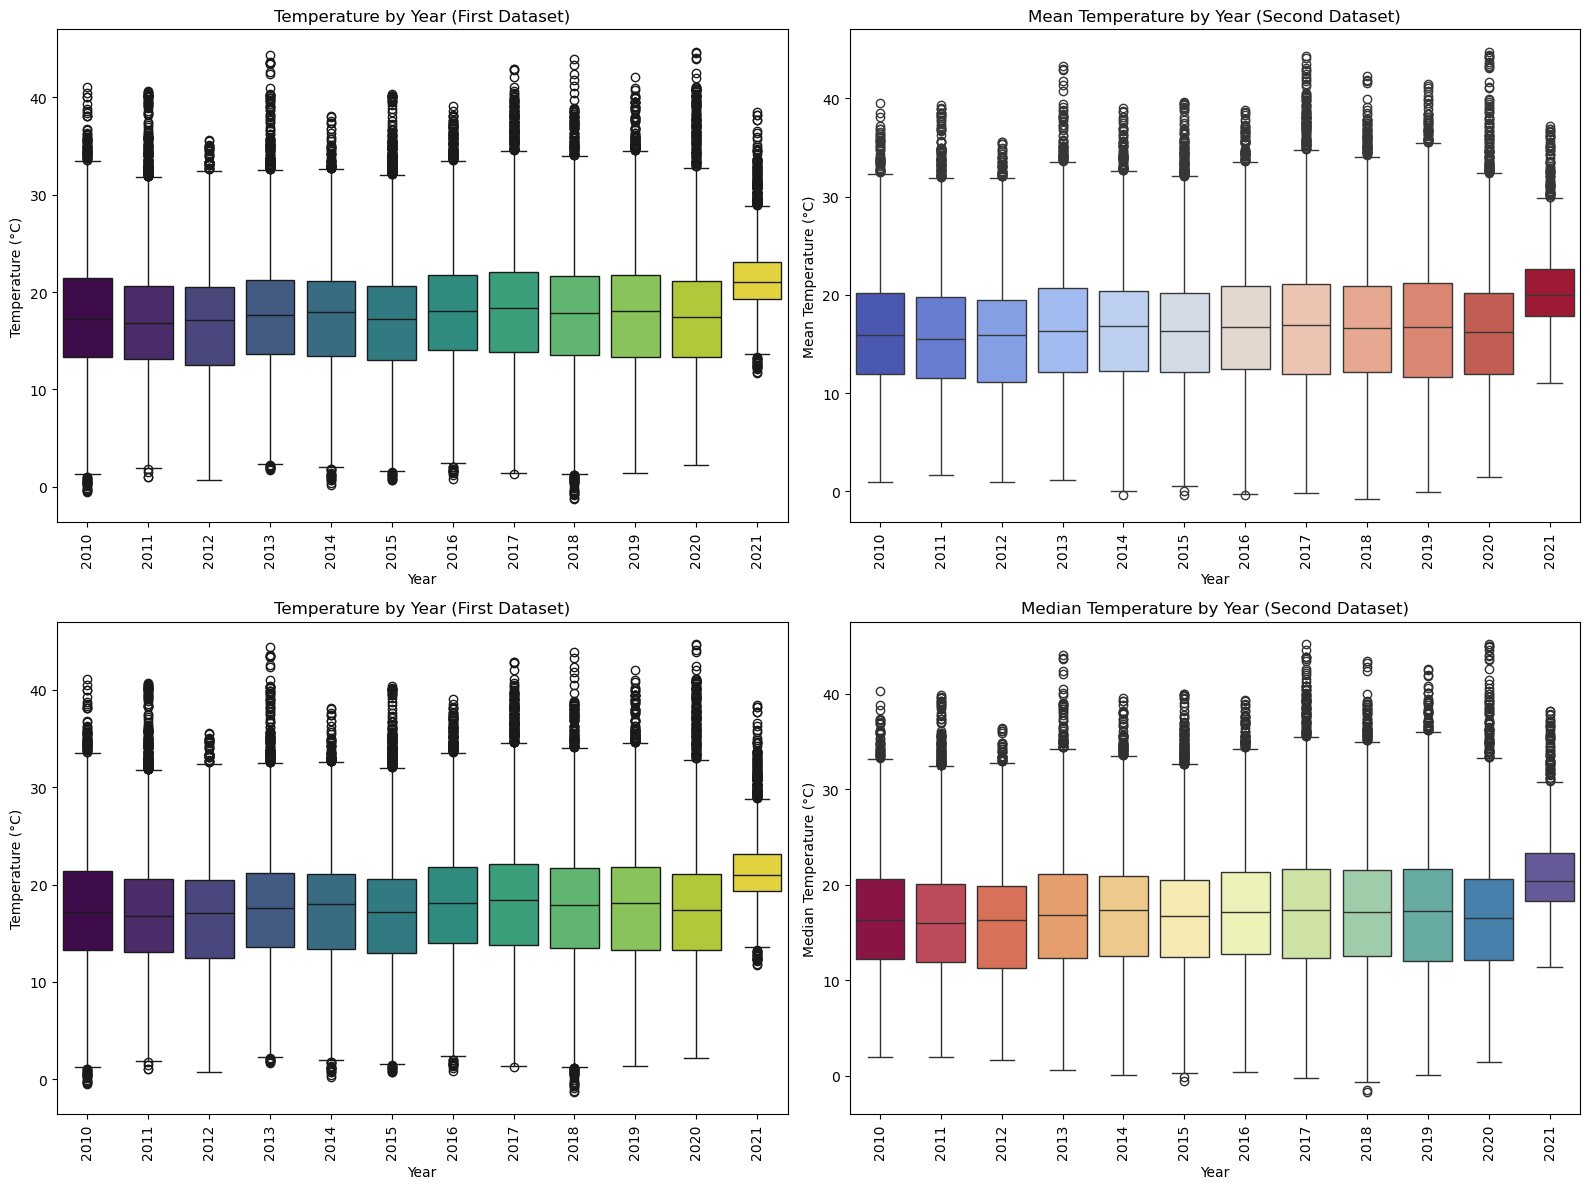

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_temp is the first dataset and df_temp2 is the second dataset

# Set up the figure and axes for side-by-side comparison of boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot for the First Dataset (df_temp) by year with colors
df_temp["year"] = df_temp["datetime"].dt.year
sns.boxplot(data=df_temp, x="year", y="temp", ax=axes[0, 0], hue="year", palette="viridis", dodge=False)
axes[0, 0].set_title("Temperature by Year (First Dataset)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Temperature (°C)")
axes[0, 0].legend_.remove()  # Remove the legend for cleaner display
for item in axes[0, 0].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the Mean Temperature by Year in the Second Dataset (df_temp2) with colors
df_temp2["year"] = df_temp2["datetime"].dt.year
sns.boxplot(data=df_temp2, x="year", y="mean_temp", ax=axes[0, 1], hue="year", palette="coolwarm", dodge=False)
axes[0, 1].set_title("Mean Temperature by Year (Second Dataset)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Mean Temperature (°C)")
axes[0, 1].legend_.remove()
for item in axes[0, 1].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the First Dataset (df_temp) by year again for comparison in the second row
sns.boxplot(data=df_temp, x="year", y="temp", ax=axes[1, 0], hue="year", palette="viridis", dodge=False)
axes[1, 0].set_title("Temperature by Year (First Dataset)")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Temperature (°C)")
axes[1, 0].legend_.remove()
for item in axes[1, 0].get_xticklabels():
    item.set_rotation(90)

# Boxplot for the Median Temperature by Year in the Second Dataset (df_temp2) with colors
sns.boxplot(data=df_temp2, x="year", y="median_temp", ax=axes[1, 1], hue="year", palette="Spectral", dodge=False)
axes[1, 1].set_title("Median Temperature by Year (Second Dataset)")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Median Temperature (°C)")
axes[1, 1].legend_.remove()
for item in axes[1, 1].get_xticklabels():
    item.set_rotation(90)

# Adjust layout for better display
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

def process_rainfall_data(file_path):
    # Load the rainfall dataset
    df = pd.read_csv(file_path)

    # Convert Year, Month, Day to a DateTime object
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Filter data between 2010-01-01 and 2021-03-18
    mask = (df['Date'] >= '2010-01-01') & (df['Date'] <= '2021-03-18')
    df_filtered = df.loc[mask]

    # Ensure "Rainfall amount (millimetres)" is numeric and modify it in place
    df_filtered.loc[:, 'Rainfall amount (millimetres)'] = pd.to_numeric(df_filtered['Rainfall amount (millimetres)'], errors='coerce')

    return df_filtered

def calculate_median_rainfall(filtered_dfs):
    # Concatenate all dataframes and group by Date to calculate the median
    combined_df = pd.concat(filtered_dfs)
    median_rainfall = combined_df.groupby('Date')['Rainfall amount (millimetres)'].median().reset_index()

    return median_rainfall

# Paths to the rainfall data files
file_paths = [
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_069140_1800_Data.csv',
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_066006_1800_Data.csv',
    '../data/NSW/Hourly_weather_data/Rainfall/IDCJAC0009_066011_1800_Data.csv'
]

# Process each rainfall dataset
filtered_dfs = [process_rainfall_data(file_path) for file_path in file_paths]

# Calculate median rainfall for each date
median_rainfall = calculate_median_rainfall(filtered_dfs)

# Save the median rainfall to a CSV file
median_rainfall.to_csv('median_rainfall_2010_2021.csv', index=False)

print("Median rainfall data saved to 'median_rainfall_2010_2021.csv'.")


Median rainfall data saved to 'median_rainfall_2010_2021.csv'.


Missing values: Date                             0
Rainfall amount (millimetres)    0
dtype: int64
                      Date  Rainfall amount (millimetres)
count                 4095                    4095.000000
mean   2015-08-10 00:00:00                       3.097253
min    2010-01-01 00:00:00                       0.000000
25%    2012-10-20 12:00:00                       0.000000
50%    2015-08-10 00:00:00                       0.000000
75%    2018-05-29 12:00:00                       1.000000
max    2021-03-18 00:00:00                     187.000000
std                    NaN                      10.213883


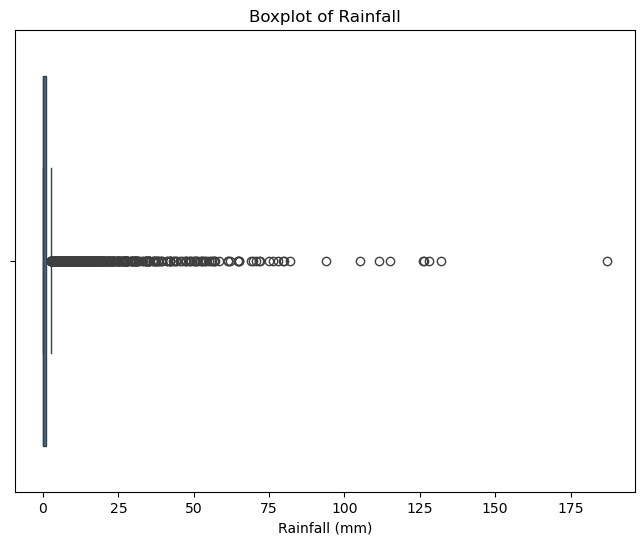

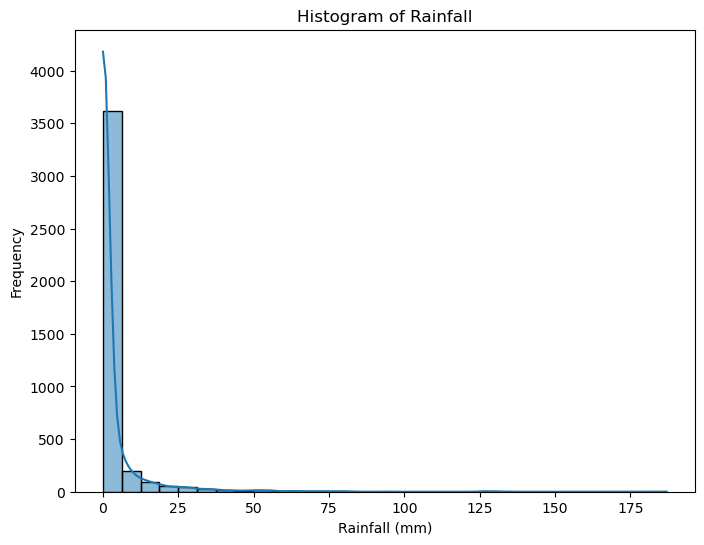

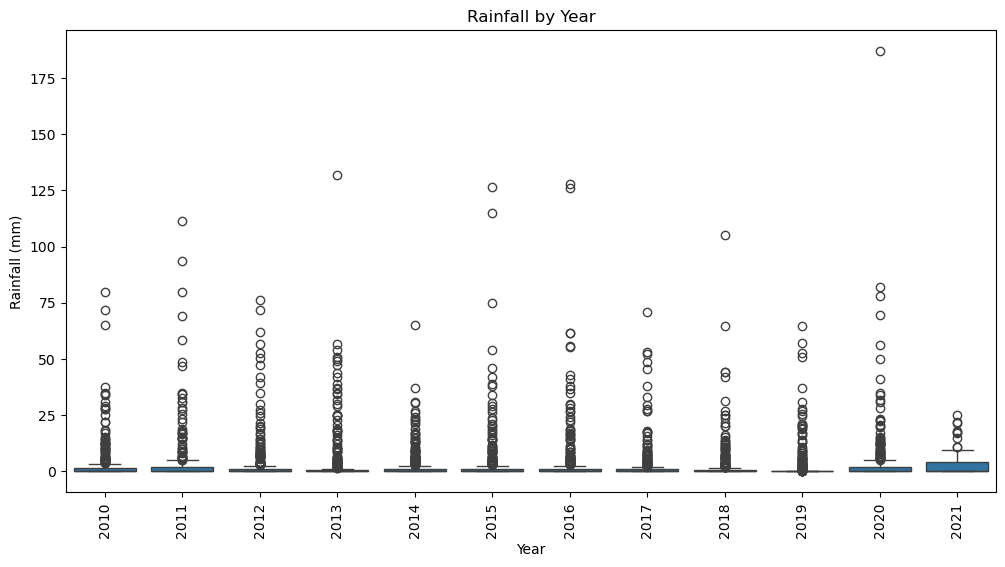

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the median rainfall data
df_rainfall = pd.read_csv('../data/NSW/median_rainfall_2010_2021.csv')

# Check for missing values
print("Missing values:", df_rainfall.isnull().sum())

# Convert 'Date' to a datetime object
df_rainfall["Date"] = pd.to_datetime(df_rainfall["Date"])

# Get summary statistics
summary_statistics = df_rainfall.describe()
print(summary_statistics)

# Plot a boxplot of rainfall
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_rainfall, x="Rainfall amount (millimetres)")
plt.title("Boxplot of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.show()

# Plot a histogram of rainfall
plt.figure(figsize=(8, 6))
sns.histplot(df_rainfall["Rainfall amount (millimetres)"], bins=30, kde=True)
plt.title("Histogram of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

# Extract the year from the 'Date' column
df_rainfall["year"] = df_rainfall["Date"].dt.year

# Plot rainfall by year
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_rainfall, x="year", y="Rainfall amount (millimetres)")
plt.title("Rainfall by Year")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()
